# Import


In [ ]:
!pip install yellowbrick --upgrade




     |████████████████████████████████| 271 kB 7.4 MB/s 
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
%load_ext google.colab.data_table

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWh09lAmZ30fZrK3o1FVMoYiFU7VwyqoYVe8ngxMQTPiCOhn7Iqyf1w
Mounted at /content/drive


# Data preprocessing

In [ ]:
# data processing
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset.csv",sep=";")
# Dataset is now stored in a Pandas Dataframe
#general information
print(df.info())
#missing values
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print(missing_data.head())
#statistics on the dataset
include =['object', 'float', 'int']
perc =[.25, .50, .75]
describ = df.describe(percentiles= perc ,include = include)
print(describ)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Elementary lesion  2362 non-null   object 
 1   Color              2362 non-null   object 
 2   Homogene           2362 non-null   object 
 3   Well_Delimited     2362 non-null   object 
 4   Reticulated        2362 non-null   object 
 5   Bourgeonnant       2362 non-null   object 
 6   Papillomatous      2362 non-null   object 
 7   Age                2116 non-null   float64
 8   Sex                2149 non-null   object 
 9   Tobacco            2321 non-null   float64
 10  Stupefies          2347 non-null   object 
 11  Alcohol            2347 non-null   object 
 12  Diagnosis          2340 non-null   object 
 13  Dysplasia          2362 non-null   object 
dtypes: float64(2), object(12)
memory usage: 258.5+ KB
None
           Total     %
Age          246  10.4
Sex          213   

In [ ]:

df # the original dataset used in this notebook

,Elementary lesion,Color,Homogene,Well_Delimited,Reticulated,Bourgeonnant,Papillomatous,Age,Sex,Tobacco,Stupefies,Alcohol,Diagnosis,Dysplasia
0,No loss of substance,White,No,Yes,No,No,No,73.0,F,0.0,No,No,LPB,No
1,No loss of substance,White,Yes,Yes,Yes,No,No,73.0,F,0.0,No,No,LPB,No
2,No loss of substance,White,Yes,Yes,Yes,No,No,73.0,F,0.0,No,No,LPB,No
3,No loss of substance,White,Yes,Yes,No,No,No,75.0,M,0.0,No,No,LEUCOKERATOSE,No
4,No loss of substance,White,Yes,Yes,No,No,No,75.0,M,0.0,No,No,LEUCOKERATOSE,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,No loss of substance,Red,No,Yes,No,No,No,23.0,F,0.0,No,No,GINGIVITE,No
2358,No loss of substance,Red,Yes,No,No,No,No,23.0,F,0.0,No,No,GINGIVITE,No
2359,No loss of substance,Red,Yes,No,No,No,No,23.0,F,0.0,No,No,GINGIVITE,No
2360,No loss of substance,Red,Yes,No,No,No,No,67.0,M,0.0,No,No,LPB,No


The dataset provided contains the medical record of 2362 patients, it's composed of facts on the patient and their diagnosis ( e.g age, smoking status, lesion). A quick overview of this dataset highlights the overallgood quality of the data provided.
Missing value:
<table>
<thead>
  <tr>
    <th></th>
    <th>Total</th>
    <th>%</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Age<br></td>
    <td>246</td>
    <td>10.4</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>213</td>
    <td>9.0</td>
  </tr>
  <tr>
    <td>Tobacco</td>
    <td>41</td>
    <td>1.7</td>
  </tr>
  <tr>
    <td>Diagnosis </td>
    <td>22</td>
    <td>0.9</td>
  </tr>
  <tr>
    <td>Stupefies</td>
    <td>15</td>
    <td>0.6</td>
  </tr>
</tbody>
</table>



# Engineering features

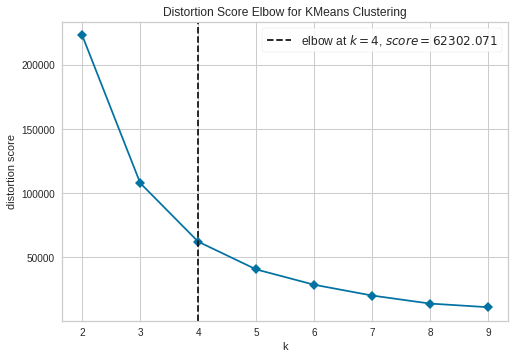

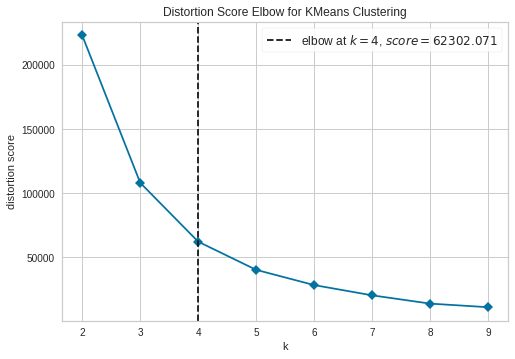

In [ ]:

import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

df = pd.read_csv ( "/content/drive/MyDrive/Colab Notebooks/dataset.csv" , sep=";" )
# Age : tackle the issue with the age features missing values by creating an array that contains random numbers,
# which are computed based on the mean age value in regards to the standard deviation and is_null numbers
mean = df [ "Age" ].mean ()
std = df [ "Age" ].std ()
is_null = df [ "Age" ].isnull ().sum ()
    # compute random numbers between the mean, std and is_null
rand_age = np.random.randint ( mean - std , mean + std , size=is_null )
    # fill null values in Age column with random values generated
age_slice = df [ "Age" ].copy ()
age_slice [ np.isnan ( age_slice ) ] = rand_age
df [ "Age" ] = age_slice
df [ "Age" ] = df [ "Age" ].astype ( int )
    # Age group creation using K-mean clustering
X = age_slice.values.reshape ( -1 , 1 )
    # Elbow Method for K means
model = KMeans ()
    # k is range of number of clusters.
visualizer = KElbowVisualizer ( model , k=(2 , 10) , timings=False )
visualizer.fit ( X)  # Fit data to visualizer
visualizer.show()  # Finalize and render figure
#Checking that completing missing data in the age section doesn't modify the perfect number of cluster
age_slice2 =df [ "Age" ].copy ()
age_slice2.dropna()
X2 = age_slice.values.reshape ( -1 , 1 )
visualizer2 = KElbowVisualizer ( model , k=(2 , 10) , timings=False )
visualizer2.fit ( X2)  # Fit data to visualizer
visualizer2.show()  # Finalize and render figure









In [ ]:

# Dealing with the missing values
# Diagnosis - delete the missing value in column “Diagnosis”
df = pd.read_csv ( "/content/drive/MyDrive/Colab Notebooks/dataset.csv" , sep=";" )
df.dropna ( subset=[ "Diagnosis" ] , inplace=True )
# Age : tackle the issue with the age feature missing values by creating an array that contains random numbers,
# which are computed based on the mean age value in regards to the standard deviation and "is_null" numbers
mean = df [ "Age" ].mean ()
std = df [ "Age" ].std ()
is_null = df [ "Age" ].isnull ().sum ()
# compute random numbers that are between the mean-std and mean +std to replace all missing age values
rand_age = np.random.randint ( mean - std , mean + std , size=is_null )
# fill null values in Age column with random values generated
age_slice = df [ "Age" ].copy ()
age_slice [ np.isnan ( age_slice ) ] = rand_age
df [ "Age" ] = age_slice
df [ "Age" ] = df [ "Age" ].astype ( int )
# Age group creation using K-mean clustering
X = age_slice.values.reshape ( -1 , 1 )

# You can group people into 4 age group
kmean = KMeans ( n_clusters=4 ).fit ( X )
age_group = kmean.labels_
df [ "Age" ] = age_group

# Sex- Convert null values to  the mean and set Female as 1 and male as 0

# set F to 1 and  Male to 0
df.replace ( {"Sex" : {"F" : 1 , "M" : 0}} , inplace=True )
# Make null values equal to the mean
df.loc [ df [ "Sex" ].isnull () , [ "Sex" ] ] = df [ "Sex" ].mean()
# Tobacco- Convert null values to the mean and set smokers as 1 and non smoker as 0
# If value is greater than 0 set to 1
df.loc [ df [ "Tobacco" ] > 0.0 , [ 'Tobacco' ] ] = 1
# Make null values equal to the mean
df.loc [ df [ "Tobacco" ].isnull () , [ "Tobacco" ] ] = df [ "Tobacco" ].mean()
# Stupefies- set people under the influence as 1 and non user as 0
# Set the “Yes” and “OH” to 1 and “No” to zero
df.replace ( {'Stupefies' : {'Yes' : 1 , 'No' : 0 , 'OH' : 1}} , inplace=True )

# Convert remaining strings to integer for better computation
# lesions = [ "No loss of substance" , "Bubble" , "With volume augmentation" , "With loss of substance" ,
#             "No lesion" ]
# colors = [ "White" , "Mix (white and red)" , "Normal" , "Pigmented" , "Red" ]
# diseases = [ 'LPB' , 'LEUCOKERATOSE' , 'MALADIE BULLEUSE' , 'EPULIS' , 'MYCOSE' , 'CARCINOME' ,
#              'LANGUE SABURRALE' , 'MUCOCELE' , 'ULCERATION SANS ETIOLOGIE' ,
#              'ULCERATION TRAUMATIQUE' , 'DIAPNEUSIE' , 'PAPILLOME' ,
#              'ULCERATION LIEE MALADIE SYSTEMIQUE' , 'MUQUEUSE SAINE' , 'HAMARTOMES' ,
#              'ULCERATION MEDICAMENTEUSE' , 'FIBROME' , 'APHTOSE' , 'VARIATION ANATOMIQUE' ,
#              'CHEILLITE EXFOLIATRICE' , 'PYOSTOMATITE VEGETANTE' , 'GRANULOMATOSE' ,
#              'Papillome' , 'SIALOMETAPLASIE NECROSANTE' , 'VIRAL' , 'ACCROISSEMENT GINGIVAL' ,
#              'LESION VEGETANTE PROLIFERATIVE' , 'GINGIVITE' , 'KERATOACANTHOME' ,
#              'LANGUE GEOGRAPHIQUE' , 'VASCULAIRE' , 'ERYTHROPLASIE' , 'BOTRIOMYCOME' ,
#              'LANGUE SCROTALE' , 'Aphtose' , 'HYSTIOCYTOSE X' , 'Muqueuse Saine' ,
#              'MACROCHEILLIE' , 'NEVROME TRAUMATIQUE' , 'LESION PIGMENTEE' ]
# booleans = [ "Homogene" , "Well_Delimited" , "Reticulated" , "Bourgeonnant" ,
#              "Papillomatous" , "Alcohol" , "Dysplasia" ]

# convert remaining boolean to 0 and 1
df.replace ( {"Homogene" : {"No" : 0 , "Yes" : 1}} , inplace=True )
df.replace ( {"Well_Delimited" : {"No" : 0 , "Yes" : 1}} , inplace=True )
df.replace ( {"Reticulated" : {"No" : 0 , "Yes" : 1}} , inplace=True )
df.replace ( {"Bourgeonnant" : {"No" : 0 , "Yes" : 1}} , inplace=True )
df.replace ( {"Papillomatous" : {"No" : 0 , "Yes" : 1}} , inplace=True )
df.replace ( {"Alcohol" : {"No" : 0 , "Yes" : 1}} , inplace=True )
df.replace ( {"Dysplasia" : {"No" : 0 , "Yes" : 1}} , inplace=True )
df.replace ( {"Dysplasia" : {"LANGUE" : 1}} , inplace=True )
df.dropna ( subset=[ "Dysplasia" ] , inplace=True )
# Applying the index of the (lesion,disease,color) in their list
df.replace ( {'Elementary lesion' : {"No loss of substance" : 0 , "Bubble" : 1 , "With volume augmentation" : 2 ,
                                     "With loss of substance" : 3 , "No lesion" : 4}} , inplace=True )

df.replace (
    {'Diagnosis' : {'LPB' : 0 , 'LEUCOKERATOSE' : 1 , 'MALADIE BULLEUSE' : 2 , 'EPULIS' : 3 , 'MYCOSE' : 4 ,
                    'CARCINOME' : 5 , 'LANGUE SABURRALE' : 6 , 'MUCOCELE' : 7 , 'ULCERATION SANS ETIOLOGIE' : 8 ,
                    'ULCERATION TRAUMATIQUE' : 9 , 'DIAPNEUSIE' : 10 , 'PAPILLOME' : 11 ,
                    'ULCERATION LIEE MALADIE SYSTEMIQUE' : 12 , 'MUQUEUSE SAINE' : 13 , 'HAMARTOMES' : 14 ,
                    'ULCERATION MEDICAMENTEUSE' : 15 , 'FIBROME' : 16 , 'APHTOSE' : 17 ,
                    'VARIATION ANATOMIQUE' : 18 ,
                    'CHEILLITE EXFOLIATRICE' : 19 , 'PYOSTOMATITE VEGETANTE' : 20 , 'GRANULOMATOSE' : 21 ,
                    'Papillome' : 22 , 'SIALOMETAPLASIE NECROSANTE' : 23 , 'VIRAL' : 24 ,
                    'ACCROISSEMENT GINGIVAL' : 25 ,
                    'LESION VEGETANTE PROLIFERATIVE' : 26 , 'GINGIVITE' : 27 , 'KERATOACANTHOME' : 28 ,
                    'LANGUE GEOGRAPHIQUE' : 29 , 'VASCULAIRE' : 30 , 'ERYTHROPLASIE' : 31 , 'BOTRIOMYCOME' : 32 ,
                    'LANGUE SCROTALE' : 33 , 'Aphtose' : 34 , 'HYSTIOCYTOSE X' : 35 , 'Muqueuse Saine' : 36 ,
                    'MACROCHEILLIE' : 37 , 'NEVROME TRAUMATIQUE' : 38 , 'LESION PIGMENTEE' : 39}} , inplace=True )

df.replace ( {'Color' : {"White" : 0 , "Mix (white and red)" : 1 , "Normal" : 2 , "Pigmented" : 3 , "Red" : 4}} ,
             inplace=True )


df.to_csv ( 'curedDataset.csv', index_label="Index", sep=";" )
print ( "Your training Dataset is Ready" )


Your train Dataset is Ready


Handling missing values
Usually, 30% of missing values are common in medical studies. As statistical procedures are designed for complete data, the analysis of a dataset with missing values wouldn't yield meaningfull results. The dataset needed to be edited in some way into a "complete dataset" to make the data suitable for a statistical procedure. The first step was to drop the 22 rows where the diagnosis was missing, it's not possible to implement the missing diagnosis without inevitably adding bias in our model. Once the rows with missing values were removed the of missing values table look like that:
<table>
<thead>
  <tr>
    <th>&nbsp;&nbsp;&nbsp;<br> &nbsp;&nbsp;&nbsp;</th>
    <th>&nbsp;&nbsp;&nbsp;<br>Total&nbsp;&nbsp;&nbsp;</th>
    <th>&nbsp;&nbsp;&nbsp;<br>%&nbsp;&nbsp;&nbsp;</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;<br>Age&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;<br>231&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;<br>9.9&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;<br>Sex&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;<br>198&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;<br>8.5&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;<br>Tobacco&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;<br>26&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;<br>1.1&nbsp;&nbsp;&nbsp;</td>
  </tr>
</tbody>
</table>
The rows deleted had multiple values missing, eventually using them would have led to possible biais in our model.
The remaining rows were fill by the mean of the columns at the exception of the age column (This method treats every variable individually ignoring any relationship with other variables).

Sex and tobacco are binary, patient are either male or female, smoker or not
( the choice was made to not take into account the different degree of smoking).

Age is a continuous value (in our dataset ages go from 11 to 100). To integrate this difference and tackle the issue with missing age values an array of numbers was computed based on the mean in regards to the standard deviation and allocated to the missing age slot.

Feature engineering:
Algorithms are operating on numerical data or binary data. Machine learning models won't work as expected and give very low accuracy rates if they are provided with an unadapted dataset.
Datasets have to be clean from these non-numerical data and extract numerical embeddings.
The dataset has 14 features that can be grouped in 3 different kind of group:
- Binary E.g Alcohol,Sex
- Multi-labels e.g Color,Diagnosis
- Continuous variable e.g Age
The first technique used was to affect an index to the different labels of a column, the same technique can be applied for binary and multi-labels features. There are 40 unique diagnosis listed in the dataset, they were all atributed an index going from 0 to 39.
<table>
<thead>
  <tr>
    <th>Diagnosis</th>
    <th>Index</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>LPB</td>
    <td>0</td>
  </tr>
  <tr>
    <td>LEUCOKERATOSE</td>
    <td>1</td>
  </tr>
  <tr>
    <td>MALADIE BULLEUSE</td>
    <td>2</td>
  </tr>
  <tr>
    <td>...</td>
    <td></td>
  </tr>
  <tr>
    <td>NEVROME TRAUMATIQUE</td>
    <td>38</td>
  </tr>
  <tr>
    <td>LESION PIGMENTEE</td>
    <td>39</td>
  </tr>
</tbody>
</table>
Age is a number that can be categorised in group, it may even be suitable in specific circumstances. For public health purposes, Patient are classified into pediatric, adult, and geriatric groups for health-care resources allocation. The main goal is to avoid overfitting results reducing the potential application and scaling of the model. The first step of this process is to determine the number of groups for that, there are many ways to cluster data in this case a combination of k-means clustering and the elbow method was used.
After computing the optimal number of age group, each patient is affected to the appropriate age group.

In [ ]:
df #after features engineering


,Elementary lesion,Color,Homogene,Well_Delimited,Reticulated,Bourgeonnant,Papillomatous,Age,Sex,Tobacco,Stupefies,Alcohol,Diagnosis,Dysplasia
0,0,0,0,1,0,0,0,0,1.0,0.0,0,0,0,0
1,0,0,1,1,1,0,0,0,1.0,0.0,0,0,0,0
2,0,0,1,1,1,0,0,0,1.0,0.0,0,0,0,0
3,0,0,1,1,0,0,0,0,0.0,0.0,0,0,1,0
4,0,0,1,1,0,0,0,0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,0,4,0,1,0,0,0,2,1.0,0.0,0,0,27,0
2358,0,4,1,0,0,0,0,2,1.0,0.0,0,0,27,0
2359,0,4,1,0,0,0,0,2,1.0,0.0,0,0,27,0
2360,0,4,1,0,0,0,0,3,0.0,0.0,0,0,0,0


The goal of feature engineering is to convert a database created to be understood by humang beings to a database that will be used by algorithms to predict both the diagnosis and the dysplasia status.

# Computation

Three of the most common machine learning techniques will be used on the cured dataset: K-nearest neighbors, decision tree and random forest.
To diagnose properly, algorithm need a huge amount of data  <blockquote>it's not who has the best algorithm that wins, it's who has the most data </blockquote>
There are not studies on the minimum number of samples to validate a model but by experimenting it was put in evidence that diagnosis with a numbers of samples inferior to 31 lead to errors so we add to drop them before computing.

In [ ]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score


data = pd.read_csv("curedDataset.csv",index_col="Index", sep=";")
#print(data.info())

value_counts = data["Diagnosis"].value_counts()

# Select the values where the count is less than 30
to_remove = value_counts[value_counts <= 30].index

# Keep rows where the diagnosis column is not in to_remove
data = data[~data.Diagnosis.isin(to_remove)]
data.to_csv("test.csv")


X = data.drop(['Diagnosis', 'Dysplasia'],axis=1)
Y = data['Diagnosis']



#Split the dataset into train/test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=215)

#print(X_train.dtypes)

#knn
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
report_knn = classification_report(Y_test, Y_pred_knn)
print(report_knn)


#decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_decision_tree = decision_tree.predict(X_test)
report_dt = classification_report(Y_test, Y_pred_decision_tree)
print(report_dt)






#random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_random_forest = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
report_rf = classification_report(Y_test, Y_pred_random_forest)
print(report_rf)

#Cross Validation

predictionrf = cross_val_predict(random_forest, X_train, Y_train)
predictionknn = cross_val_predict(knn, X_train, Y_train)
predictiondt = cross_val_predict(decision_tree, X_train, Y_train)
scorerf = accuracy_score(Y_train, predictionrf)
scoreknn = accuracy_score(Y_train, predictionknn)
scoredt = accuracy_score(Y_train, predictiondt)
precisionrf = precision_score(Y_train, predictionrf,average="weighted")
recallrf = recall_score(Y_train, predictionrf,average="weighted")
precisionknn = precision_score(Y_train, predictionknn,average="weighted")
recallknn = recall_score(Y_train, predictionknn,average="weighted")
precisiondt = precision_score(Y_train, predictiondt,average="weighted")
recalldt = recall_score(Y_train, predictiondt,average="weighted")
results = pd.DataFrame({
    'Model': ['KNN',  'Random Forest', 'Decision Tree'],
    'Precision': [precisionknn, precisionrf ,  precisiondt],
    'Recall': [recallknn, recallrf,  recalldt],
    'F1 Score': [scoreknn.mean(), scorerf.mean(),  scoredt.mean()]
     })
result_df = results.sort_values(by='Recall', ascending=False)
result_df = result_df.set_index('Model')
print(result_df.head(9))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80       238
           1       0.58      0.49      0.53        53
           2       0.64      0.54      0.59        83
           3       0.57      0.57      0.57         7
           4       0.38      0.25      0.30        12
           5       0.56      0.62      0.59         8
           8       0.17      0.08      0.11        12
          12       0.75      0.43      0.55        14
          14       1.00      0.88      0.93         8
          17       0.35      0.38      0.36        16
          18       1.00      0.56      0.71         9
          20       0.86      0.75      0.80         8
          24       0.50      0.30      0.37        10
          25       0.77      0.90      0.83        30
          29       0.80      0.67      0.73        12
          30       0.80      0.44      0.57         9

    accuracy                           0.69       529
   macro avg       0.65   

Computation shows a clear lead of the random forest algorithm on the other ones. These results are confirmed by the cross validation.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import precision_score, recall_score


data = pd.read_csv("curedDataset.csv",index_col="Index",sep=";")
#Because of the way the csv was created panda can't detect missing values inside the Dysplasia (look at row 509,510,1288,1289 of the dataset provided)
#This lines will deal with this problem
index_drop = []
for index,row in data.iterrows():
    if row['Dysplasia'] != '0' and row['Dysplasia'] != '1' :
        index_drop.append(index)
da = data.drop(index = index_drop)
X = da.drop(['Dysplasia'],axis=1)
Y = da['Dysplasia']
#Split the dataset into train/test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=215)

#print(X_train.dtypes)

#knn
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
print(cm_knn)

#decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_decision_tree = decision_tree.predict(X_test)
cm_dt = confusion_matrix(Y_test, Y_pred_decision_tree)
print(cm_dt)




#random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_random_forest = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
cm_rf = confusion_matrix(Y_test, Y_pred_random_forest)
print(cm_rf)

#Cross Validation
predictionrf = cross_val_predict(random_forest, X_train, Y_train)
predictionknn = cross_val_predict(knn, X_train, Y_train)
predictiondt = cross_val_predict(decision_tree, X_train, Y_train)
precisionrf = precision_score(Y_train, predictionrf,average="weighted")
recallrf = recall_score(Y_train, predictionrf,average="weighted")
precisionknn = precision_score(Y_train, predictionknn,average="weighted")
recallknn = recall_score(Y_train, predictionknn,average="weighted")
precisiondt = precision_score(Y_train, predictiondt,average="weighted")
recalldt = recall_score(Y_train, predictiondt,average="weighted")
scorerf = accuracy_score(Y_train, predictionrf)
scoreknn = accuracy_score(Y_train, predictionknn)
scoredt = accuracy_score(Y_train, predictiondt)
results = pd.DataFrame({
    'Model': ['KNN',  'Random Forest', 'Decision Tree'],
    'Precision': [precisionknn, precisionrf ,  precisiondt],
    'Recall': [recallknn, recallrf,  recalldt],
    'F1 Score': [scoreknn.mean(), scorerf.mean(),  scoredt.mean()]})
result_df = results.sort_values(by='Recall', ascending=False)
result_df = result_df.set_index('Model')
print(result_df.head(9))

[[557   1]
 [  6  20]]
[[556   2]
 [  3  23]]
[[556   2]
 [  3  23]]
               Precision    Recall  F1 Score
Model                                       
Random Forest   0.988358  0.988584  0.988584
Decision Tree   0.983214  0.983447  0.983447
KNN             0.976520  0.977740  0.977740


The overall accuracy of the 3 is significantly up but random forest still remains the most efficient algorithm out of the 3 used.

# References

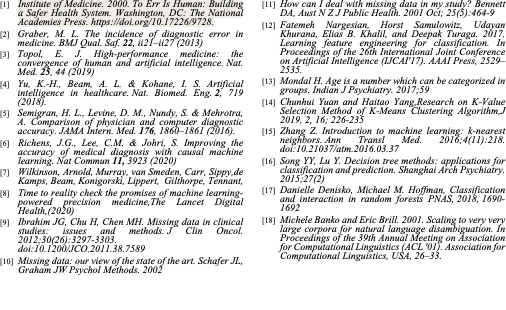